# 12/30/22 - Notebook to create a 2D integrated datacube for each of the SLACS objects. I somehow did it for J0037 with QFitsView, but I can't figure that out now...

In [2]:
################################################################

# import general libraries and modules
import numpy as np
np.set_printoptions(threshold=10000)
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams.update({'font.size': 14})
import pandas as pd
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
warnings.filterwarnings( "ignore", module = "plotbin\..*" )
from os import path
import glob
#import Image from PIL
from PIL import Image

# astronomy/scipy
from astropy.io import fits

# specify object directory and name
data_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/' # data directory

#################################################
# objects
obj_names = ['SDSSJ0029-0055',
             'SDSSJ0037-0942',
             'SDSSJ0330-0020',
             'SDSSJ1112+0826',
             'SDSSJ1204+0358',
             'SDSSJ1250+0523',
             'SDSSJ1306+0600',
             'SDSSJ1402+6321',
             'SDSSJ1531-0105',
             'SDSSJ1538+5817',
             'SDSSJ1621+3931',
             'SDSSJ1627-0053',
             'SDSSJ1630+4520',
             'SDSSJ2303+1422'
            ]

#################################################


Working with  SDSSJ0029-0055


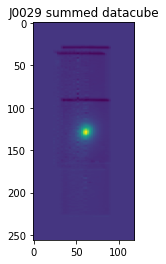

Finished with  {'SDSSJ0029-0055'}

#####################################
Working with  SDSSJ0037-0942


<Figure size 432x288 with 0 Axes>

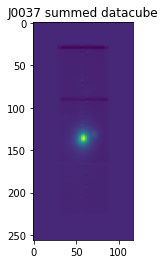

Finished with  {'SDSSJ0037-0942'}

#####################################
Working with  SDSSJ0330-0020


<Figure size 432x288 with 0 Axes>

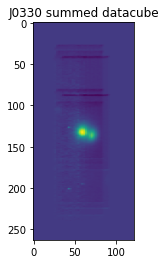

Finished with  {'SDSSJ0330-0020'}

#####################################
Working with  SDSSJ1112+0826


<Figure size 432x288 with 0 Axes>

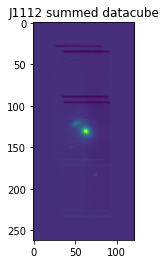

Finished with  {'SDSSJ1112+0826'}

#####################################
Working with  SDSSJ1204+0358


<Figure size 432x288 with 0 Axes>

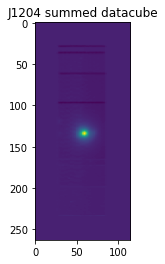

Finished with  {'SDSSJ1204+0358'}

#####################################
Working with  SDSSJ1250+0523


<Figure size 432x288 with 0 Axes>

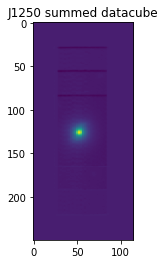

Finished with  {'SDSSJ1250+0523'}

#####################################
Working with  SDSSJ1306+0600


<Figure size 432x288 with 0 Axes>

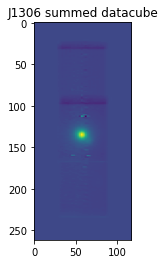

Finished with  {'SDSSJ1306+0600'}

#####################################
Working with  SDSSJ1402+6321


<Figure size 432x288 with 0 Axes>

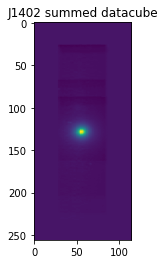

Finished with  {'SDSSJ1402+6321'}

#####################################
Working with  SDSSJ1531-0105


<Figure size 432x288 with 0 Axes>

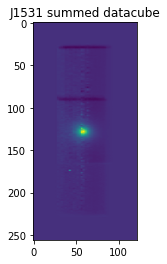

Finished with  {'SDSSJ1531-0105'}

#####################################
Working with  SDSSJ1538+5817


<Figure size 432x288 with 0 Axes>

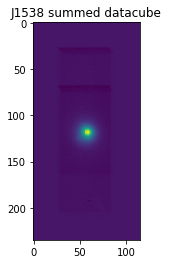

Finished with  {'SDSSJ1538+5817'}

#####################################
Working with  SDSSJ1621+3931


<Figure size 432x288 with 0 Axes>

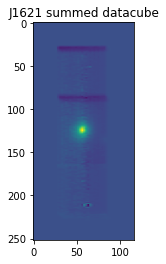

Finished with  {'SDSSJ1621+3931'}

#####################################
Working with  SDSSJ1627-0053


<Figure size 432x288 with 0 Axes>

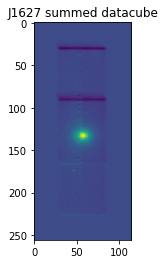

Finished with  {'SDSSJ1627-0053'}

#####################################
Working with  SDSSJ1630+4520


<Figure size 432x288 with 0 Axes>

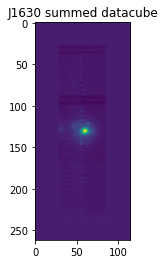

Finished with  {'SDSSJ1630+4520'}

#####################################
Working with  SDSSJ2303+1422


<Figure size 432x288 with 0 Axes>

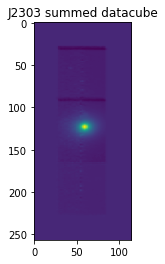

Finished with  {'SDSSJ2303+1422'}

#####################################


<Figure size 432x288 with 0 Axes>

In [6]:
# function to loop through all objects, open datacube, sum over 0 axis (spectrum) and save that

for obj_name in obj_names:
    print('Working with ', obj_name)
    obj_abbr = obj_name[4:9] # e.g. J0029
    # load file
    hdul = fits.open(f'{data_dir}/mosaics/{obj_name}/KCWI_{obj_abbr}_icubes_mosaic_0.1457.fits')
    hdul.verify('fix')
    datacube = hdul[0].data
    header = hdul[0].header
    # sum datacube and show
    summed_datacube = datacube.sum(axis=0)
    plt.figure()
    plt.imshow(summed_datacube)
    plt.title(f'{obj_abbr} summed datacube')
    plt.pause(1)
    plt.clf()
    # save as new fits file
    hdu = fits.PrimaryHDU(summed_datacube)
    hdu.header = header
    hdul = fits.HDUList([hdu])
    hdul.writeto(f'{data_dir}/mosaics/{obj_name}/KCWI_{obj_abbr}_icubes_mosaic_0.1457_2D_integrated.fits')
    print('Finished with ', {obj_name})
    print()
    print('#####################################')

Working with  SDSSJ0029-0055


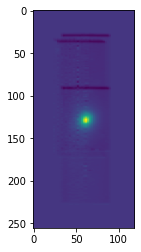

0029-0055
Working with  SDSSJ0037-0942


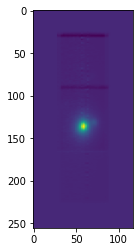

0037-0942
Working with  SDSSJ0330-0020


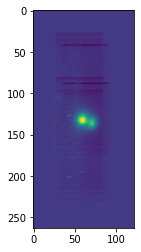

0330-0020
Working with  SDSSJ1112+0826


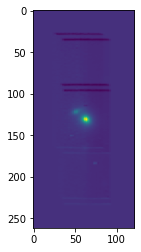

J1112
Working with  SDSSJ1204+0358


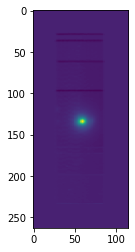

SDSSJ1204+0358
Working with  SDSSJ1250+0523


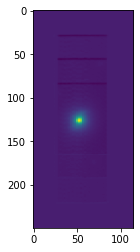

SDSSJ1250+0523
Working with  SDSSJ1306+0600


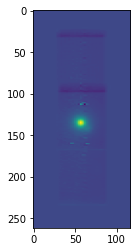

1131-1231
Working with  SDSSJ1402+6321


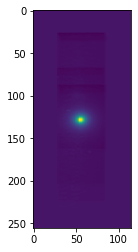

SDSSJ1402+6321
Working with  SDSSJ1531-0105


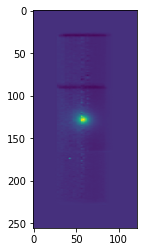

1531-0105
Working with  SDSSJ1538+5817


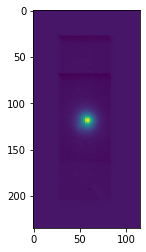

SDSSJ1538+5817
Working with  SDSSJ1621+3931


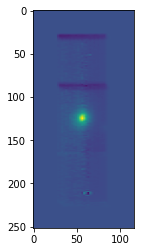

1621+3931
Working with  SDSSJ1627-0053


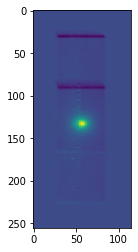

1131-1231
Working with  SDSSJ1630+4520


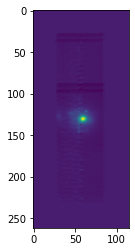

1630+4520
Working with  SDSSJ2303+1422


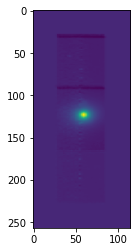

2303+1422


<Figure size 432x288 with 0 Axes>

In [12]:
for obj_name in obj_names:
    print('Working with ', obj_name)
    obj_abbr = obj_name[4:9] # e.g. J0029
    # load file
    hdul = fits.open(f'{data_dir}/mosaics/{obj_name}/KCWI_{obj_abbr}_icubes_mosaic_0.1457_2D_integrated.fits')
    hdul.verify('fix')
    datacube = hdul[0].data
    header = hdul[0].header
    plt.imshow(datacube)
    plt.pause(1)
    plt.clf()
    print(header['OBJECT'])